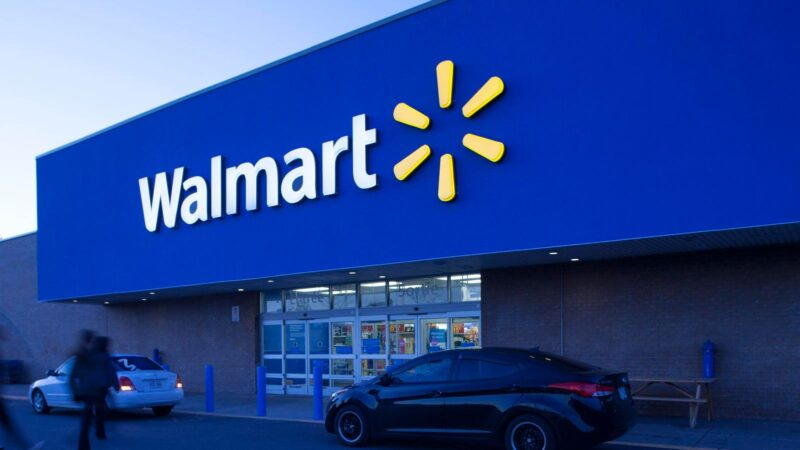

In [27]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [28]:
#Import dataset
df = pd.read_csv('Walmart_sales.csv')

In [47]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [50]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

# EDA

In [51]:
# Top 10 Stores by Total Sales
top_10 = df.groupby('Store').agg({'Weekly_Sales':'sum'}).sort_values(by='Weekly_Sales', ascending=False).head(10)

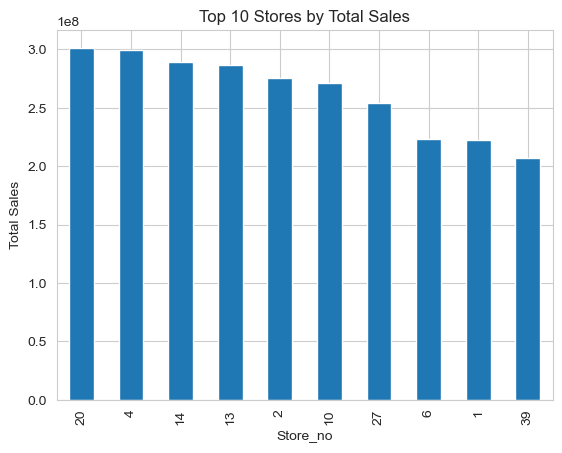

In [52]:
top_10.plot(kind = 'bar', y = 'Weekly_Sales', legend = False)
plt.xlabel('Store_no')
plt.ylabel('Total Sales')
plt.title('Top 10 Stores by Total Sales')

plt.show()

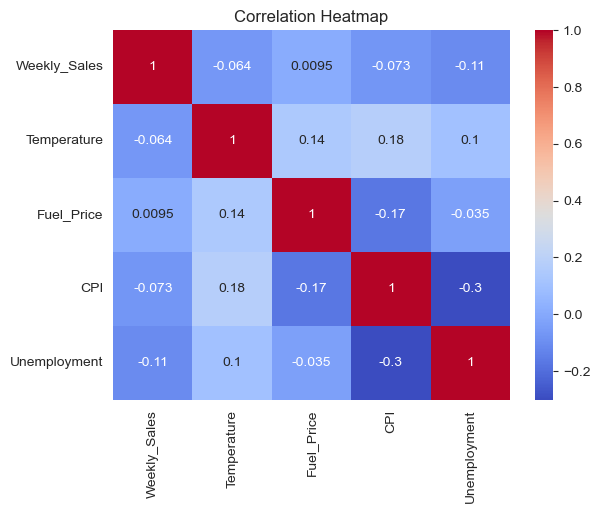

In [53]:
# Correlation Heatmap
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
# Workday vs Holiday Sales
avg_hol_sales = df.loc[ df['Holiday_Flag'] == 1] \
                        .groupby('Store') \
                        .agg({'Weekly_Sales' : 'mean'}) \
                        .rename(columns = {'Weekly_Sales' : 'Avg_sal_holiday'})

avg_sal_workday = df.loc[ df['Holiday_Flag'] == 0] \
                            .groupby('Store') \
                            .agg({'Weekly_Sales' : 'mean'}) \
                            .rename(columns = {'Weekly_Sales' : 'Avg_sal_workday'})


<AxesSubplot:xlabel='Store'>

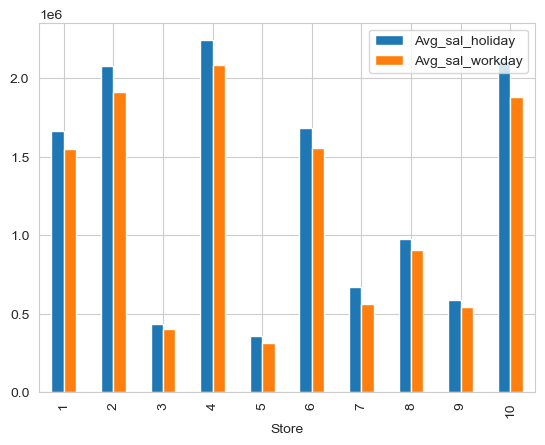

In [55]:
work_vs_holi = pd.concat([avg_hol_sales, avg_sal_workday ], axis = 1)
work_vs_holi.head(10) \
    .plot.bar()

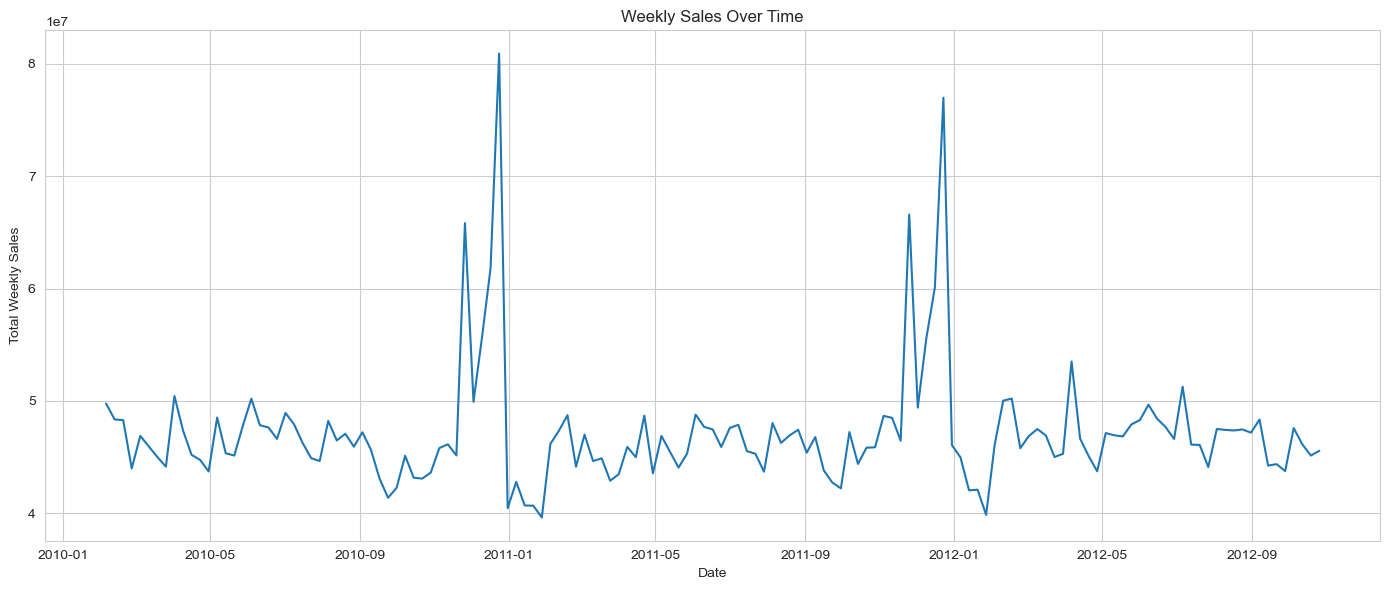

In [57]:
# Weekly Sales Over Time
plt.figure(figsize=(14, 6))
plt.plot(df.groupby('Date')['Weekly_Sales'].sum())
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.tight_layout()
plt.show()